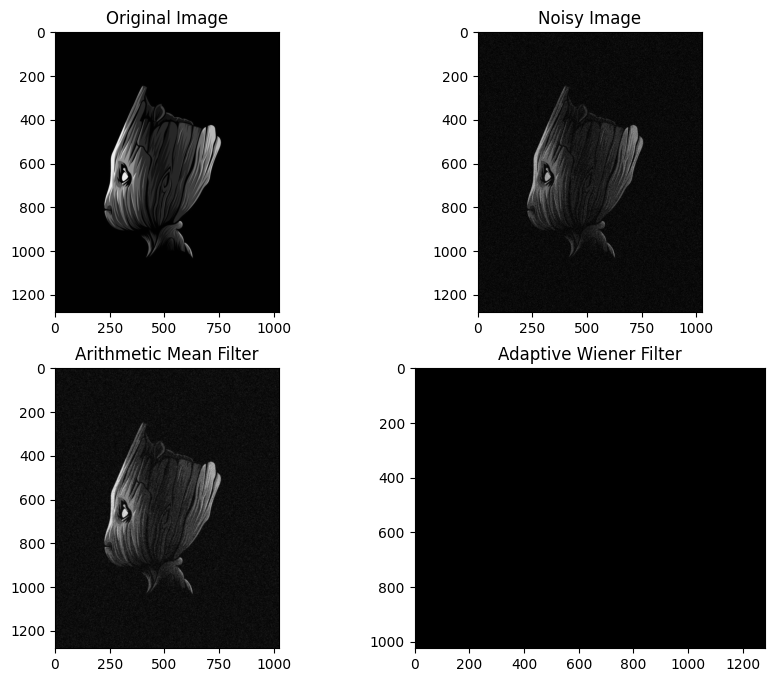

In [38]:
import cv2
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt


def add_noise(image, noise_type='gaussian', mean=0, sigma=25):
    row, col = image.shape
    if noise_type == 'gaussian':
        gauss = np.random.normal(mean, sigma, (row, col))
        noisy = image + gauss
        return np.clip(noisy, 0, 255).astype(np.uint8)
    elif noise_type == 'salt_and_pepper':
        s_vs_p = 0.5
        amount = 0.04
        out = np.copy(image)

        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
                  for i in image.shape]
        out[coords] = 255

        # Pepper mode
        num_pepper = np.ceil(amount * image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
                  for i in image.shape]
        out[coords] = 0
        return out.astype(np.uint8)
    else:
        raise ValueError("Unsupported noise type")

def arithmetic_mean_filter(image, kernel_size=(3, 3)):
    kernel = np.ones(kernel_size, np.float32) / (kernel_size[0] * kernel_size[1])
    result = cv2.filter2D(image, -1, kernel)
    return result

def adaptive_wiener_filter(image, kernel_size=(3, 3)):
    psf = np.ones(kernel_size, np.float32) / (kernel_size[0] * kernel_size[1])
    noise_var = np.var(image - arithmetic_mean_filter(image, kernel_size))
    result = cv2.warpAffine(image, cv2.getRotationMatrix2D((kernel_size[0] // 2, kernel_size[1] // 2), 180, 1), image.shape)
    result = convolve2d(result, psf, 'same', 'symm') / (1 + noise_var / np.var(result))
    return result.astype(np.uint8)

# Read the grayscale image
image_path = 'F:\Lab 6\wallpaperflare.com_wallpaper (2).jpg'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Add Gaussian noise
noisy_image = add_noise(gray_image, noise_type='gaussian')

# Apply arithmetic mean filter
arithmetic_mean_result = arithmetic_mean_filter(noisy_image)

# Apply adaptive Wiener filter
adaptive_wiener_result = adaptive_wiener_filter(noisy_image)

# Display the results
cv2.imshow('Original Image', gray_image)
cv2.imshow('Noisy Image', noisy_image)
cv2.imshow('Arithmetic Mean Filter Result', arithmetic_mean_result)
cv2.imshow('Adaptive Wiener Filter Result', adaptive_wiener_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Plot the images
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(gray_image, cmap='gray')

plt.subplot(2, 2, 2)
plt.title('Noisy Image')
plt.imshow(noisy_image, cmap='gray')

plt.subplot(2, 2, 3)
plt.title('Arithmetic Mean Filter')
plt.imshow(arithmetic_mean_result, cmap='gray')

plt.subplot(2, 2, 4)
plt.title('Adaptive Wiener Filter')
plt.imshow(adaptive_wiener_result, cmap='gray')

plt.show()


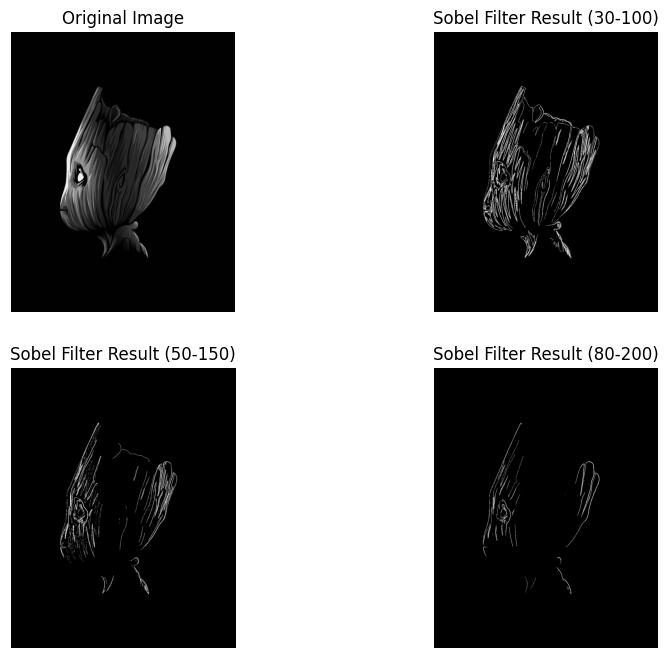

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def apply_sobel(image, threshold_low, threshold_high):
    # Apply Sobel filter
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate gradient magnitude
    gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)

    # Normalize the gradient magnitude to 8-bit for visualization
    gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Apply thresholding to detect edges
    edges = np.zeros_like(gradient_magnitude)
    edges[(gradient_magnitude >= threshold_low) & (gradient_magnitude <= threshold_high)] = 255

    return edges

# Read the grayscale image
image_path = 'F:\Lab 6\wallpaperflare.com_wallpaper (2).jpg'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Sobel filter with different thresholding
threshold_low_1, threshold_high_1 = 30, 100
edges_1 = apply_sobel(gray_image, threshold_low_1, threshold_high_1)

threshold_low_2, threshold_high_2 = 50, 150
edges_2 = apply_sobel(gray_image, threshold_low_2, threshold_high_2)

threshold_low_3, threshold_high_3 = 80, 200
edges_3 = apply_sobel(gray_image, threshold_low_3, threshold_high_3)

# Display the results
cv2.imshow('Original Image', gray_image)
cv2.imshow(f'Sobel Filter Result ({threshold_low_1}-{threshold_high_1})', edges_1)
cv2.imshow(f'Sobel Filter Result ({threshold_low_2}-{threshold_high_2})', edges_2)
cv2.imshow(f'Sobel Filter Result ({threshold_low_3}-{threshold_high_3})', edges_3)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Plot the images
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(edges_1, cmap='gray')
plt.title(f'Sobel Filter Result ({threshold_low_1}-{threshold_high_1})')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(edges_2, cmap='gray')
plt.title(f'Sobel Filter Result ({threshold_low_2}-{threshold_high_2})')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(edges_3, cmap='gray')
plt.title(f'Sobel Filter Result ({threshold_low_3}-{threshold_high_3})')
plt.axis('off')

plt.show()
